# installing pakages

In [80]:
!pip install torch==1.8.2 torchvision==0.9.2 torchaudio===0.8.2 --extra-index-url https://download.pytorch.org/whl/lts/1.8/cpu

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/lts/1.8/cpu


In [2]:
!git clone https://github.com/ultralytics/yolov5 

Cloning into 'yolov5'...


In [1]:
!cd yolov5 & pip install -r requirements.txt

In [7]:
import torch  # will be used to load the yolo model and make the detection
from matplotlib import pyplot as plt # for visualing images
import numpy as np # for array transformation
import cv2 #for access the webcam and render feeds

In [8]:
import os
import uuid
import time

# Load Model

In [ ]:
model = tch.hub.load('ultralytics/yolov5', ') # loading the basic model

In [4]:
model


AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

# Detection with basic modle yolov5

In [5]:
 imgs = ['https://www.wawanesa.com/resources/img/usa/blog-images/bigstock-The-Only-Vacant-Parking-Space--262193803-min.jpg']

In [6]:
results = model(imgs)
results.print()

image 1/1: 2213x3319 14 cell phones
Speed: 3567.3ms pre-process, 187.5ms inference, 31.2ms NMS per image at shape (1, 3, 448, 640)


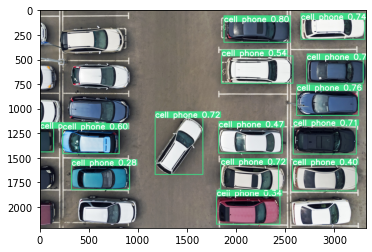

In [7]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

# Real time Detection

In [8]:
cap = cv2.VideoCapture('carPark.mp4')
while cap.isOpened():
    ret, frame = cap.read()
        
    results = model(frame)
        
        
    cv2.imshow("ParkingDE", np.squeeze(results.render()))
        
    if cv2.waitKey(10) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Trainning Data

In [1]:
!python train.py --img 640 --batch 16 --epochs 5 --data parking43.yaml --weights yolov5s.pt --worker 2

# Load Model

In [49]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp7/weights/best.pt',force_reload=True)  # local model 

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\ENVY/.cache\torch\hub\master.zip
YOLOv5  2022-6-8 Python-3.8.9 torch-1.8.2+cu111 CUDA:0 (NVIDIA GeForce MX150, 2048MiB)



Exception: [Errno 2] No such file or directory: 'yolov5\\runs\\train\\exp7\\weights\\best.pt'. Cache may be out of date, try `force_reload=True` or see https://github.com/ultralytics/yolov5/issues/36 for help.

In [44]:
img = os.path.join('parking_space_imgs', 'images', 'val', 'V_16.jpg')

In [45]:
results = model(img)

In [46]:
results.print

<bound method Detections.print of <models.common.Detections object at 0x000001E0BC750FA0>>

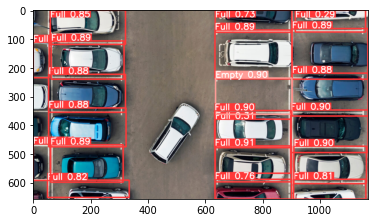

In [47]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [48]:
cap = cv2.VideoCapture('carPark.mp4')
while cap.isOpened():
    ret, frame = cap.read()
        
    results = model(frame)
        
        
    cv2.imshow("ParkingDE", np.squeeze(results.render()))
        
    if cv2.waitKey(10) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()